## CODTECH INTERNSHIP
Task-4: SENTIMENT ANALYSIS
1. PERFORM SENTIMENT ANALYSIS ON TEXUAL DATA USING NATURAL LANGUAGE PROCESSING(NLP) TECHNIQUES.
2. DELIVERABLE: A NOTEBOOK SHOWCASING DATA PREPROCESSING, MODEL IMPLEMENTATION, AND INSIGHTS.

# Import all important libraries

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Radhika\Downloads\archive (8)\Tweets.csv")

In [3]:
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

# Explore the data

In [4]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='airline_sentiment'>

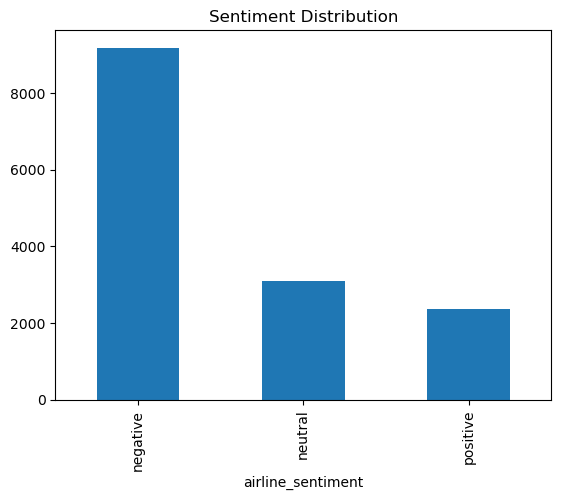

In [5]:
# Check class distribution
df['airline_sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')

# Preprocess the text

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+', '', text)              # remove URLs
    text = re.sub(r'@\w+', '', text)                 # remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # remove special characters
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Radhika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Radhika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Vectorize Text

In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])


# Encode Sentiment Text

In [8]:
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])  # negative: 0, neutral: 1, positive: 2


# Split and Train Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluate the model

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


[[1779   81   29]
 [ 262  286   32]
 [ 125   56  278]]
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.68      0.49      0.57       580
    positive       0.82      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



In [11]:
!pip install wordcloud

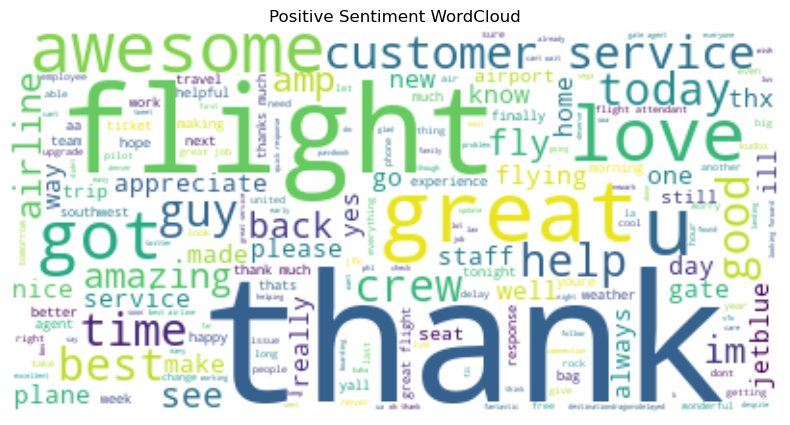

In [12]:
# WordCloud
from wordcloud import WordCloud

positive = ' '.join(df[df['airline_sentiment']=='positive']['clean_text'])
wordcloud = WordCloud(background_color='white').generate(positive)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')
plt.show()


# Sentiment Distribution Pie Chart

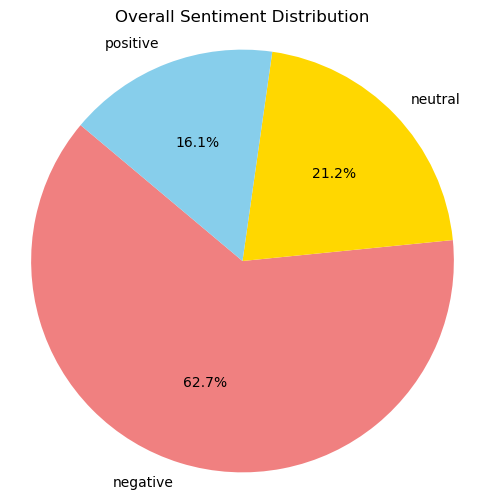

In [13]:
sentiment_counts = df['airline_sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'skyblue'])
plt.axis('equal')
plt.title("Overall Sentiment Distribution")
plt.show()


# Sentiment Count by Airline

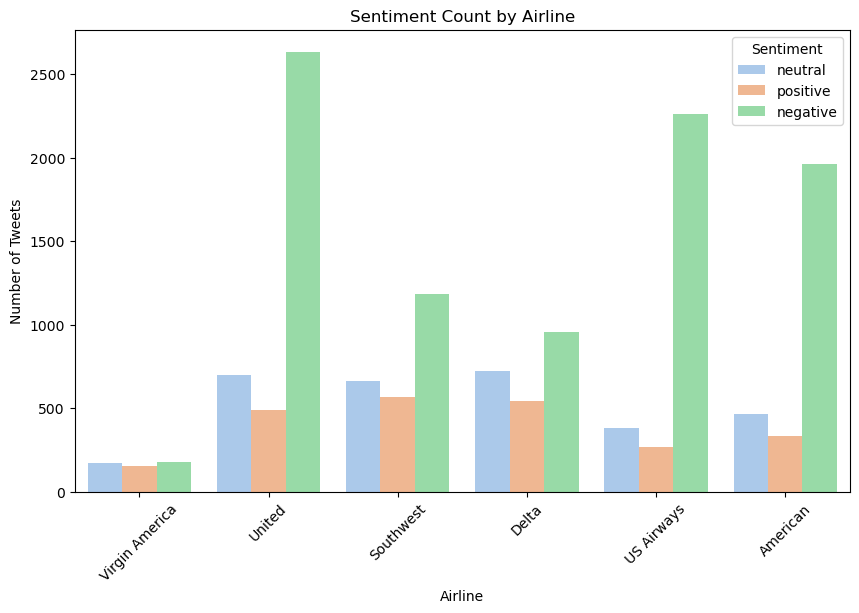

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='pastel')
plt.title('Sentiment Count by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


# Average Confidence Per Sentiment

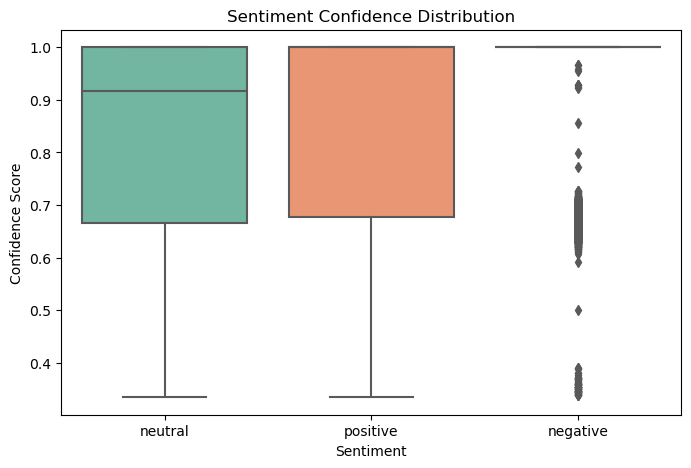

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=df, palette='Set2')
plt.title('Sentiment Confidence Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Confidence Score')
plt.show()


# Most Frequent Words

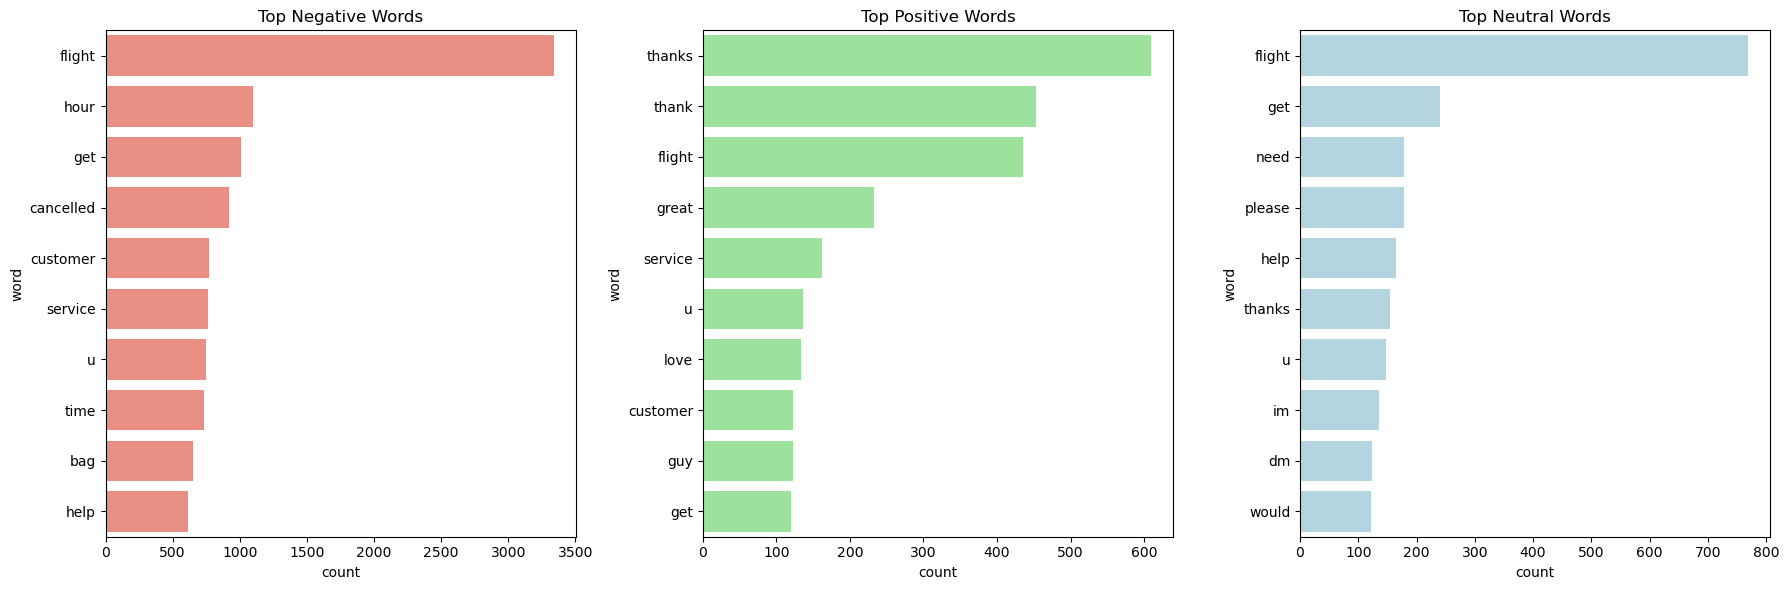

In [16]:
from collections import Counter

def get_top_words(sentiment, n=10):
    words = ' '.join(df[df['airline_sentiment'] == sentiment]['clean_text']).split()
    return Counter(words).most_common(n)

top_neg = get_top_words('negative')
top_pos = get_top_words('positive')
top_neu = get_top_words('neutral')

# Convert to DataFrames
neg_df = pd.DataFrame(top_neg, columns=['word', 'count'])
pos_df = pd.DataFrame(top_pos, columns=['word', 'count'])
neu_df = pd.DataFrame(top_neu, columns=['word', 'count'])

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18,6))
sns.barplot(x='count', y='word', data=neg_df, ax=axes[0], color='salmon')
axes[0].set_title('Top Negative Words')

sns.barplot(x='count', y='word', data=pos_df, ax=axes[1], color='lightgreen')
axes[1].set_title('Top Positive Words')

sns.barplot(x='count', y='word', data=neu_df, ax=axes[2], color='lightblue')
axes[2].set_title('Top Neutral Words')

plt.tight_layout()
plt.show()
